In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
diabetes_DS = pd.read_csv('data/diabetes.csv')

Displays the first few rows of the dataset, statistical summary, shape (number of rows and columns), and the count of different classes in the 'Outcome' column (0 - Non-Diabetic, 1 - Diabetic).

In [3]:
diabetes_DS.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_DS.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes_DS.shape

(768, 9)

In [6]:
diabetes_DS['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 - Non-Diabetic \
1 - Diabetic


In [7]:
df = diabetes_DS.groupby('Outcome').mean().T

In [8]:
df

Outcome,0,1
Pregnancies,3.298000,4.865672
Glucose,109.980000,141.257463
BloodPressure,68.184000,70.824627
SkinThickness,19.664000,22.164179
Insulin,68.792000,100.335821
BMI,30.304200,35.142537
DiabetesPedigreeFunction,0.429734,0.550500
Age,31.190000,37.067164


This formula calculates the percentage difference between values in columns labeled 0 and 1 in the DataFrame 'df'. The result is then stored in a new column labeled '%diff'. This formula is commonly used to measure the relative difference between two values.

In [9]:
df['%diff'] = (abs(df[0] - df[1] )/ ((df[0] + df[1])/2)) *100

In [10]:
df

Outcome,0,1,%diff
Pregnancies,3.298000,4.865672,38.406044
Glucose,109.980000,141.257463,24.898725
BloodPressure,68.184000,70.824627,3.799227
SkinThickness,19.664000,22.164179,11.954520
Insulin,68.792000,100.335821,37.301753
BMI,30.304200,35.142537,14.785572
DiabetesPedigreeFunction,0.429734,0.550500,24.640239
Age,31.190000,37.067164,17.220651


In [11]:
data = diabetes_DS.drop(columns= 'Outcome', axis=1)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

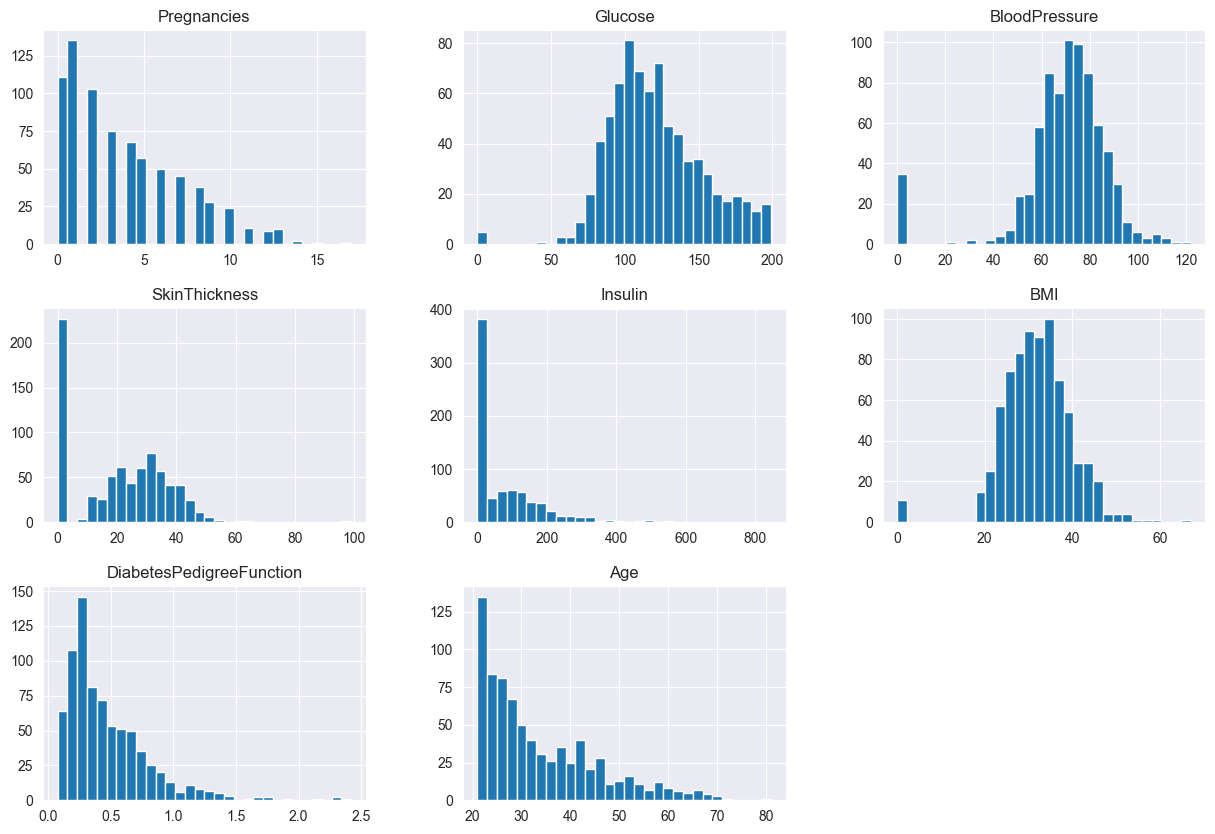

In [13]:
data.hist(bins=30, figsize=(15,10))
plt.show()

In [14]:
from pandas.plotting import scatter_matrix

In [15]:
corr_matrix = data.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


Computes the correlation matrix for the features in the dataset and visualizes it using a heatmap. This helps to identify relationships between different features.

<Axes: >

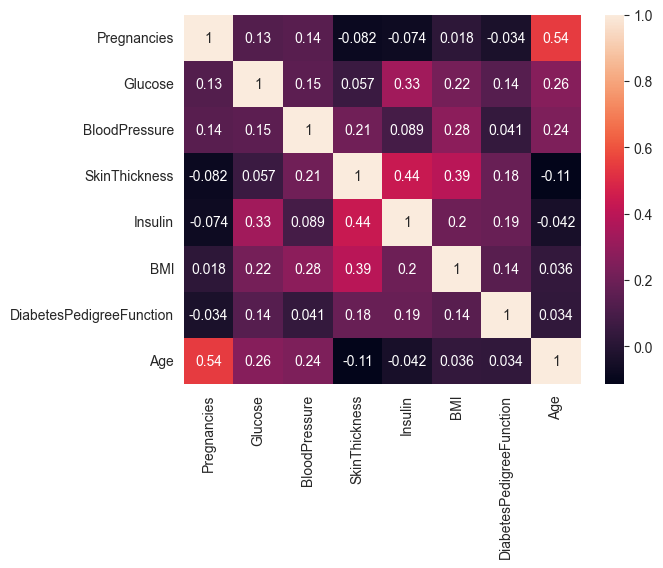

In [16]:
sns.heatmap(corr_matrix, annot= True)

A correlation coefficient of 0.54, representing the maximum correlation between the variables "Pregnancies" and "Age," is considered moderate. This moderate correlation does not raise concerns.

# preprocessing
performing imputation for missing values in specific columns of the diabetes dataset using the median value of each respective column.

In [17]:
# Calculate the median value for BMI
median_bmi = diabetes_DS['BMI'].median()
# Substitute it in the BMI column of the
# dataset where values are 0
diabetes_DS['BMI'] = diabetes_DS['BMI'].replace(
    to_replace=np.nan, value=median_bmi)

median_bloodp = diabetes_DS['BloodPressure'].median()
# Substitute it in the BloodP column of the
# dataset where values are 0
diabetes_DS['BloodPressure'] = diabetes_DS['BloodPressure'].replace(
    to_replace=np.nan, value=median_bloodp)

# Calculate the median value for PlGlcConc
median_plglcconc = diabetes_DS['Glucose'].median()
# Substitute it in the PlGlcConc column of the
# dataset where values are 0
diabetes_DS['Glucose'] = diabetes_DS['Glucose'].replace(
    to_replace=np.nan, value=median_plglcconc)

# Calculate the median value for SkinThick
median_skinthick = diabetes_DS['SkinThickness'].median()
# Substitute it in the SkinThick column of the
# dataset where values are 0
diabetes_DS['SkinThickness'] = diabetes_DS['SkinThickness'].replace(
    to_replace=np.nan, value=median_skinthick)

# Calculate the median value for SkinThick
median_skinthick = diabetes_DS['Insulin'].median()
# Substitute it in the SkinThick column of the
# dataset where values are 0
diabetes_DS['Insulin'] = diabetes_DS['Insulin'].replace(
    to_replace=np.nan, value=median_skinthick)

## Use Z-scores to identify and filter out the outliers.

The boxen plot for Insulin shows that the data is skewed, with a long tail of high values. This means that there are a few people with very high Insulin levels, which could be due to outliers or a different population.

<Axes: >

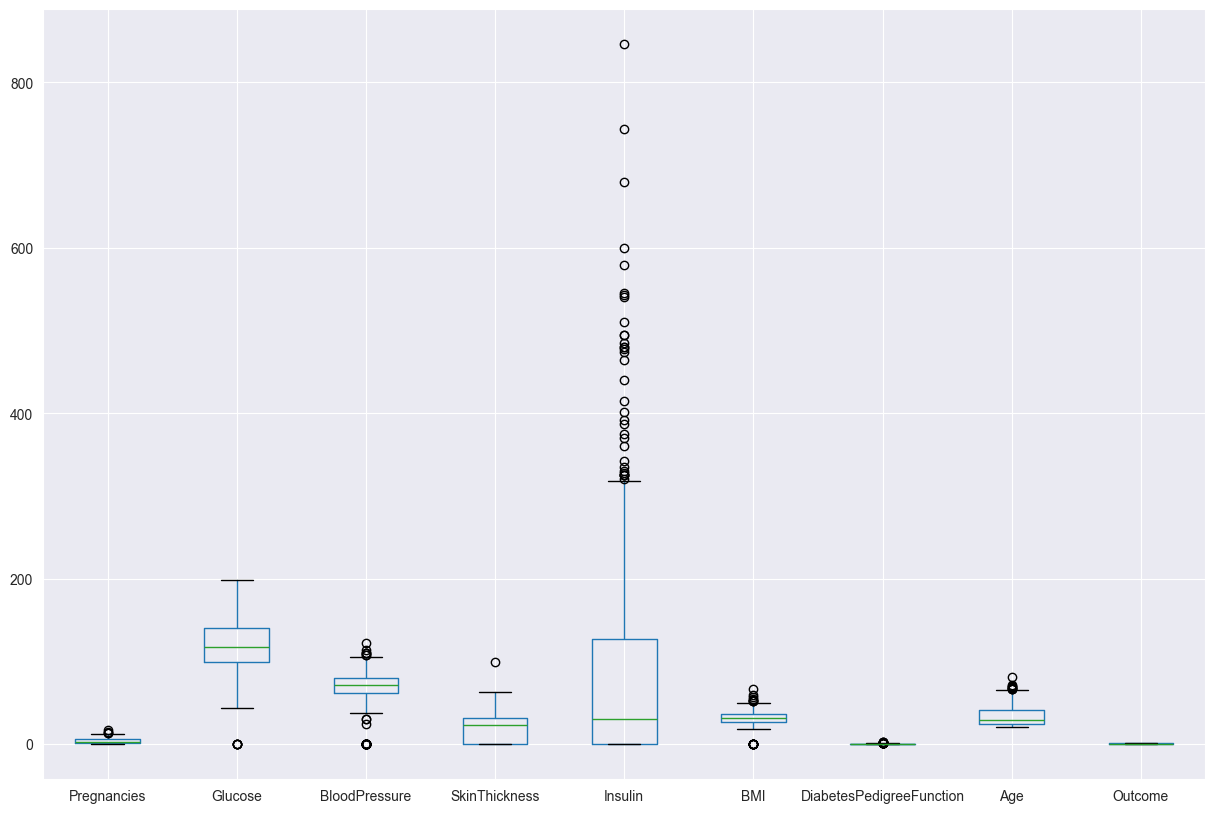

In [18]:
diabetes_DS.boxplot(figsize=(15,10))

In [19]:
from scipy import stats
# Define a threshold for the Z-score
z_threshold = 3
# Calculate the Z-scores for each column
z_scores = stats.zscore(diabetes_DS)

# Create a boolean mask for outliers
outlier_mask = (abs(z_scores) < z_threshold).all(axis=1)

# Filter the dataset to remove outliers
diabetes_DS2 = diabetes_DS[outlier_mask]

# Print information about the removed outliers
outliers_removed = diabetes_DS.shape[0] - diabetes_DS2.shape[0]
print(f"Number of outliers removed: {outliers_removed}")

Number of outliers removed: 80


After z

<Axes: >

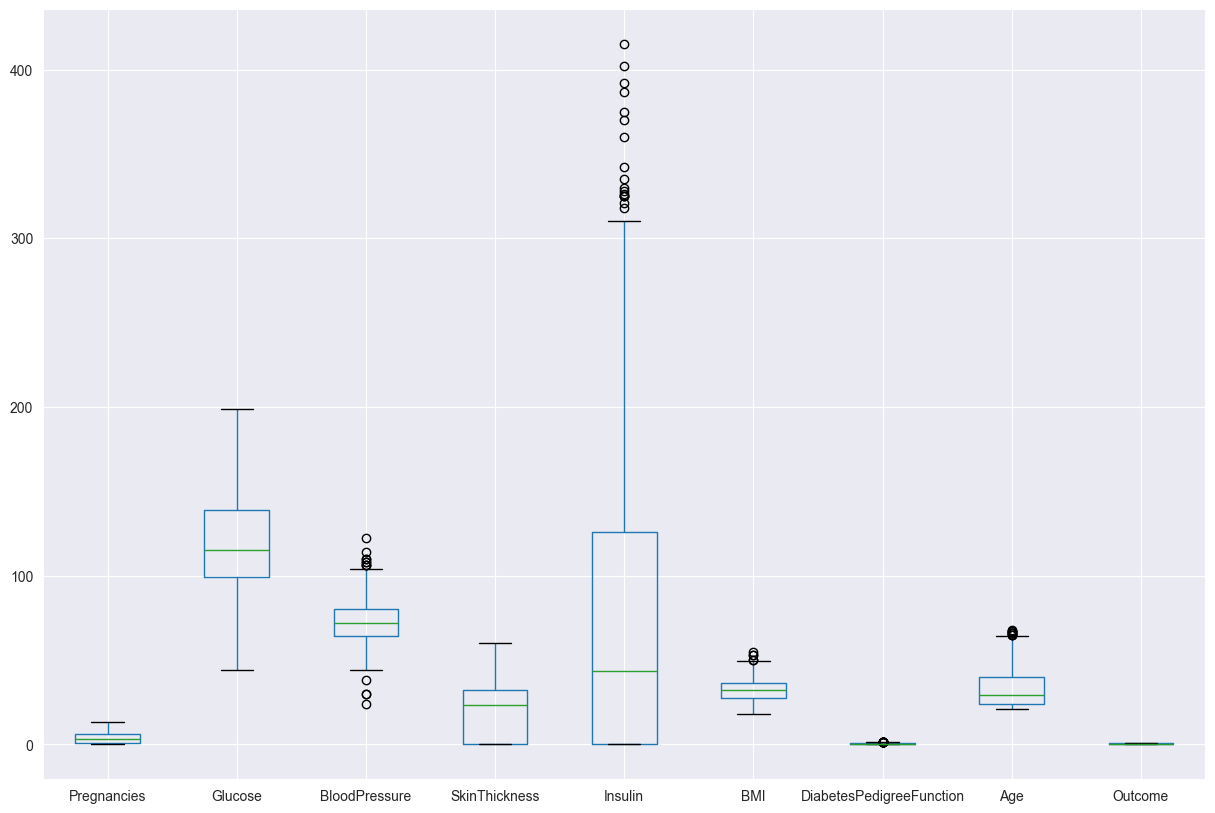

In [20]:
diabetes_DS2.boxplot(figsize=(15,10))

# Feature Engineering

In [21]:
def set_bmi(row):
    if row["BMI"] < 18.5:
        return "Under"
    elif row["BMI"] >= 18.5 and row["BMI"] <= 24.9:
        return "Healthy"
    elif row["BMI"] >= 25 and row["BMI"] <= 29.9:
        return "Over"
    elif row["BMI"] >= 30:
        return "Obese"

diabetes_DS2 = diabetes_DS2.assign(BM_DESC=diabetes_DS2.apply(set_bmi, axis=1))

diabetes_DS2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BM_DESC
0,6,148,72,35,0,33.6,0.627,50,1,Obese
1,1,85,66,29,0,26.6,0.351,31,0,Over
2,8,183,64,0,0,23.3,0.672,32,1,Healthy
3,1,89,66,23,94,28.1,0.167,21,0,Over
5,5,116,74,0,0,25.6,0.201,30,0,Over


In [22]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

diabetes_DS2 = diabetes_DS2.assign(INSULIN_DESC=diabetes_DS2.apply(set_insulin, axis=1))

diabetes_DS2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BM_DESC,INSULIN_DESC
0,6,148,72,35,0,33.6,0.627,50,1,Obese,Abnormal
1,1,85,66,29,0,26.6,0.351,31,0,Over,Abnormal
2,8,183,64,0,0,23.3,0.672,32,1,Healthy,Abnormal
3,1,89,66,23,94,28.1,0.167,21,0,Over,Normal
5,5,116,74,0,0,25.6,0.201,30,0,Over,Abnormal


Number of patients Having Abnormal Insulin Levels:  435
Number of patients Having Normal Insulin Levels:  253


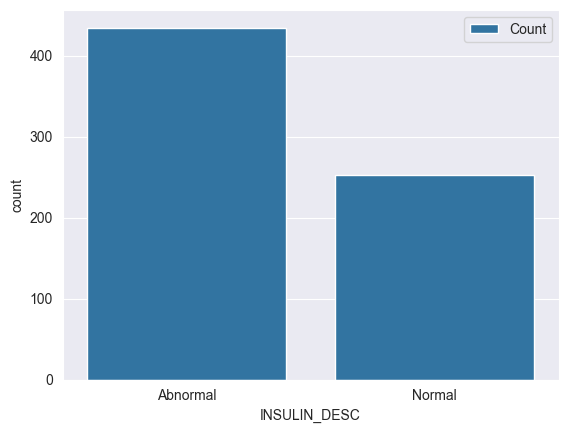

In [23]:
sns.countplot(data=diabetes_DS2, x = 'INSULIN_DESC', label='Count')

AB, NB = diabetes_DS2['INSULIN_DESC'].value_counts()
print('Number of patients Having Abnormal Insulin Levels: ',AB)
print('Number of patients Having Normal Insulin Levels: ',NB)

Number of patients Having Underweight BMI Index:  424
Number of patients Having Healthy BMI Index:  166
Number of patients Having Overweigth BMI Index:  94
Number of patients Having Obese BMI Index:  4


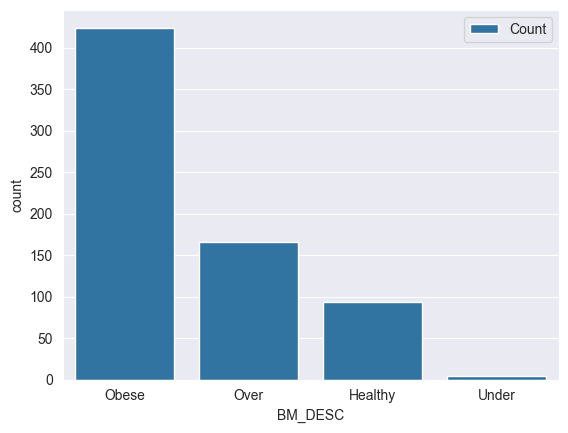

In [24]:
sns.countplot(data=diabetes_DS2, x = 'BM_DESC', label='Count')

UD,H,OV,OB = diabetes_DS2['BM_DESC'].value_counts()
print('Number of patients Having Underweight BMI Index: ',UD)
print('Number of patients Having Healthy BMI Index: ',H)
print('Number of patients Having Overweigth BMI Index: ',OV)
print('Number of patients Having Obese BMI Index: ',OB)

In [25]:
diabetes_DS2.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
BM_DESC                      object
INSULIN_DESC                 object
dtype: object

In [26]:
diabetes_DS2=pd.get_dummies(diabetes_DS2)

In [27]:
# Assuming your DataFrame is named diabetes_DS2
diabetes_DS2['BM_DESC_Healthy'] = pd.factorize(diabetes_DS2['BM_DESC_Healthy'])[0]
diabetes_DS2['BM_DESC_Obese'] = pd.factorize(diabetes_DS2['BM_DESC_Obese'])[0]
diabetes_DS2['BM_DESC_Over'] = pd.factorize(diabetes_DS2['BM_DESC_Over'])[0]
diabetes_DS2['INSULIN_DESC_Abnormal'] = pd.factorize(diabetes_DS2['INSULIN_DESC_Abnormal'])[0]
diabetes_DS2['INSULIN_DESC_Normal'] = pd.factorize(diabetes_DS2['INSULIN_DESC_Normal'])[0]

In [28]:
diabetes_DS2.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
BM_DESC_Healthy               int64
BM_DESC_Obese                 int64
BM_DESC_Over                  int64
BM_DESC_Under                  bool
INSULIN_DESC_Abnormal         int64
INSULIN_DESC_Normal           int64
dtype: object

In [29]:
cols_drop=['Outcome','BM_DESC_Under']
X=diabetes_DS2.drop(cols_drop,axis=1)
Y = diabetes_DS2['Outcome']

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [31]:
X[0:5]

array([[ 0.65735547,  0.92404008, -0.02811548,  0.92321895, -0.80526561,
         0.21028523,  0.60651604,  1.47921983, -0.39780543, -0.78907636,
        -0.56392168, -0.76263307, -0.76263307],
       [-0.86848989, -1.17708222, -0.51576543,  0.53346156, -0.80526561,
        -0.84806325, -0.36422044, -0.18326505, -0.39780543,  1.26730446,
         1.77329589, -0.76263307, -0.76263307],
       [ 1.26769361,  2.09133025, -0.67831541, -1.35036587, -0.80526561,
        -1.34699896,  0.76478829, -0.09576584,  2.51379174,  1.26730446,
        -0.56392168, -0.76263307, -0.76263307],
       [-0.86848989, -1.04367763, -0.51576543,  0.14370416,  0.23869826,
        -0.62127429, -1.01137809, -1.05825709, -0.39780543,  1.26730446,
         1.77329589,  1.31124658,  1.31124658],
       [ 0.3521864 , -0.14319664,  0.13443451, -1.35036587, -0.80526561,
        -0.99925589, -0.89179461, -0.27076425, -0.39780543,  1.26730446,
         1.77329589, -0.76263307, -0.76263307]])

In [32]:
Y.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=42)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(688, 13) (550, 13) (138, 13)


# Logistic regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logisticregression = LogisticRegression(solver='lbfgs', max_iter=200)

In [37]:
logisticregression.fit(X_train,Y_train)

LogisticRegression(max_iter=200)

In [38]:
round(logisticregression.score(X_train, Y_train)*100, 2)

79.09

In [39]:
round(logisticregression.score(X_test, Y_test)*100, 2)

78.99

In [40]:
from sklearn.metrics import classification_report

In [41]:
Y_pred = logisticregression.predict(X_test)
Y_test_pred = pd.DataFrame({
    'Y_test': Y_test,
    'Y_pred': Y_pred
})
Y_test_pred.head()

,Y_test,Y_pred
463,0,0
432,0,0
46,0,0
115,1,1
646,1,0


In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[83,  9],
       [20, 26]], dtype=int64)

In [43]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        92
           1       0.74      0.57      0.64        46

    accuracy                           0.79       138
   macro avg       0.77      0.73      0.75       138
weighted avg       0.78      0.79      0.78       138



In [44]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

# Calculate precision-recall curve
precision_curve, recall_curve, _ = precision_recall_curve(Y_test, Y_pred)

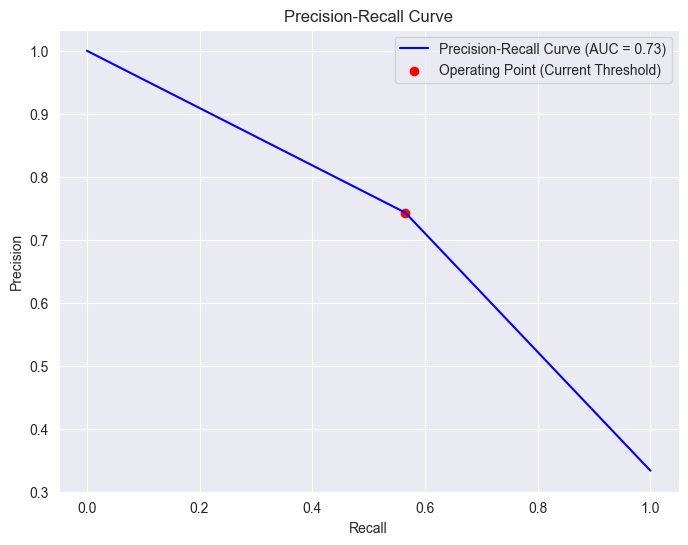

In [45]:
# Plot precision-recall curve
area_under_curve = auc(recall_curve, precision_curve)
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, label=f'Precision-Recall Curve (AUC = {area_under_curve:.2f})', color='b')
plt.scatter(recall, precision, color='r', marker='o', label='Operating Point (Current Threshold)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)


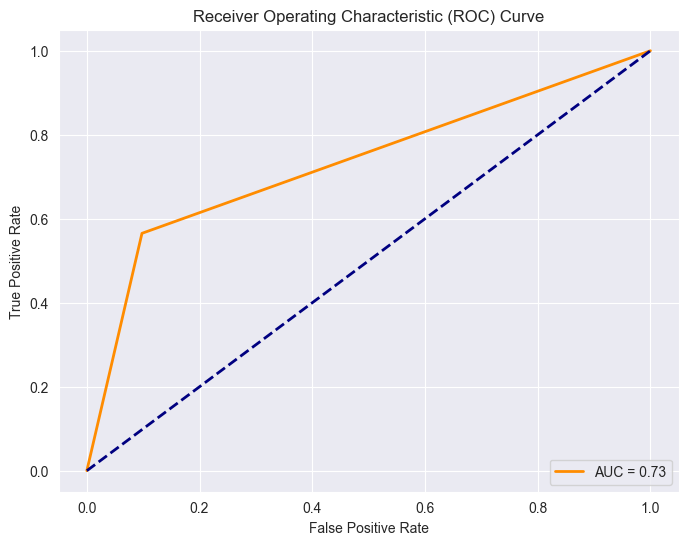

In [47]:

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# MLP model with tensorflow

In [48]:
X_train_scaled =  X_train
X_test_scaled =  X_test

In [49]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [50]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
              loss='MSE',
              metrics=['accuracy' , tf.keras.metrics.AUC()])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
history = model.fit(X_train_scaled, Y_train, epochs=100 , batch_size=10, validation_split=0.2)

Epoch 1/100


44/44 [==============================] - 1s 4ms/step - loss: 0.2689 - accuracy: 0.4273 - auc: 0.5115 - val_loss: 0.2575 - val_accuracy: 0.4545 - val_auc: 0.6683
Epoch 2/100
44/44 [==============================] - 0s 1ms/step - loss: 0.2576 - accuracy: 0.4682 - auc: 0.5788 - val_loss: 0.2476 - val_accuracy: 0.5455 - val_auc: 0.7098
Epoch 3/100
44/44 [==============================] - 0s 1ms/step - loss: 0.2485 - accuracy: 0.5386 - auc: 0.6335 - val_loss: 0.2395 - val_accuracy: 0.6364 - val_auc: 0.7415
Epoch 4/100
44/44 [==============================] - 0s 1ms/step - loss: 0.2407 - accuracy: 0.6205 - auc: 0.6799 - val_loss: 0.2317 - val_accuracy: 0.6727 - val_auc: 0.7653
Epoch 5/100
44/44 [==============================] - 0s 1ms/step - loss: 0.2335 - accuracy: 0.6818 - auc: 0.7073 - val_loss: 0.2236 - val_accuracy: 0.7091 - val_auc: 0.7786
Epoch 6/100
44/44 [==============================] - 0s 1ms/step - loss: 0.2264 - accuracy: 0.7205 - auc: 0.7360 - val_loss: 0.2164 -

In [52]:
# Evaluate the model on the test set
test_loss, test_accuracy, test_auc = model.evaluate(X_test_scaled, Y_test)
print(f'\nTest Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test AUC: {test_auc:.4f}')

5/5 [==============================] - 0s 1ms/step - loss: 0.1534 - accuracy: 0.7754 - auc: 0.8425

Test Accuracy: 77.54%
Test AUC: 0.8425


In [53]:
 # Predict probabilities on the test set
y_pred  = model.predict(X_test_scaled)
y_pred = np.where(y_pred >= 0.5, 1, 0)


5/5 [==============================] - 0s 877us/step


In [54]:
confusion_matrix(Y_test, y_pred)

array([[80, 12],
       [19, 27]], dtype=int64)

In [55]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        92
           1       0.69      0.59      0.64        46

    accuracy                           0.78       138
   macro avg       0.75      0.73      0.74       138
weighted avg       0.77      0.78      0.77       138



In [56]:


# Calculate precision and recall
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)

# Calculate precision-recall curve
precision_curve, recall_curve, _ = precision_recall_curve(Y_test, y_pred)


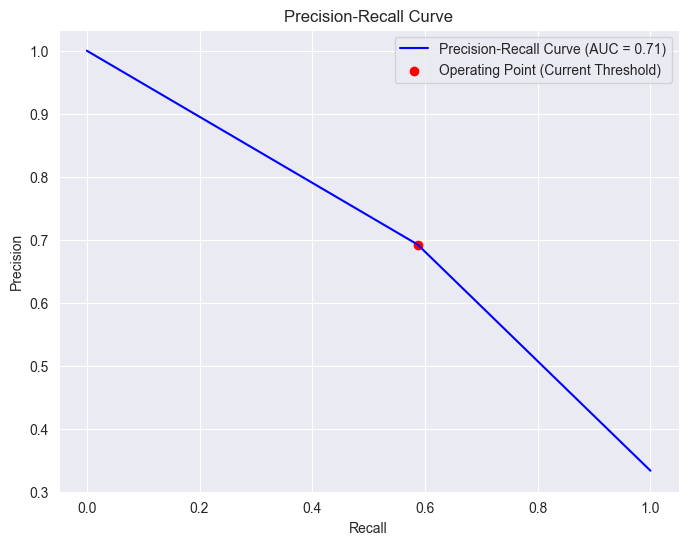

In [57]:
# Plot precision-recall curve
area_under_curve = auc(recall_curve, precision_curve)
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, label=f'Precision-Recall Curve (AUC = {area_under_curve:.2f})', color='b')
plt.scatter(recall, precision, color='r', marker='o', label='Operating Point (Current Threshold)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

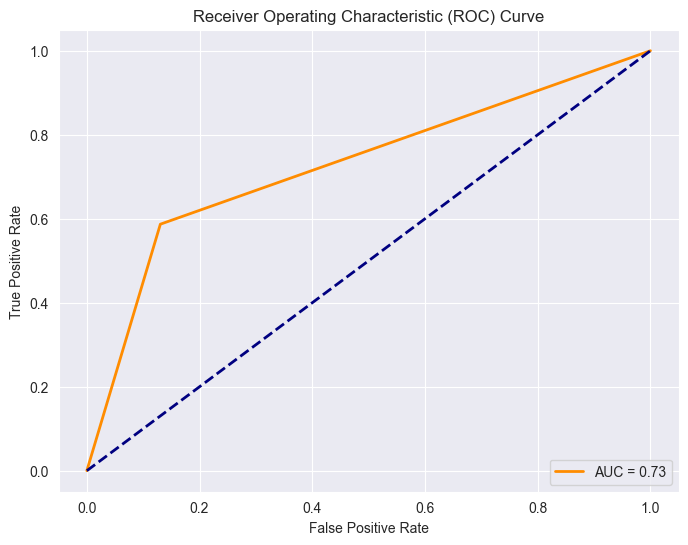

In [58]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred)
#roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

